## CASE STUDY

### Poverty, life expectancy, and Gross Domestic Product (GDP) are three critical indicators that reflect a country's economic and social conditions. 

### In Africa, these indicators vary widely between countries, making it challenging to understand the complex relationship between poverty, life expectancy, and GDP. 

### This case study aims to provide a deep dive into the correlation between these indicators in African countries.

###  Python -for JUPYTER NOTEBOOK

In [2]:
# Import Libraries for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from collections import Counter
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew, kurtosis

In [3]:
df = pd.read_excel(r"C:\Users\HENRY OKEOMA\Downloads\life-expectancy 2.xlsx")
df

,Code,Year,Life expectancy at birth (historical),CountryName,IncomeGroup,Region
0,AGO,1940,26.98,Angola,Lower middle income,Middle Africa
1,AGO,1950,36.30,Angola,Lower middle income,Middle Africa
2,AGO,1951,36.40,Angola,Lower middle income,Middle Africa
3,AGO,1952,36.50,Angola,Lower middle income,Middle Africa
4,AGO,1953,36.70,Angola,Lower middle income,Middle Africa
...,...,...,...,...,...,...
3932,ZWE,2017,60.70,Zimbabwe,Lower middle income,Eastern Africa
3933,ZWE,2018,61.40,Zimbabwe,Lower middle income,Eastern Africa
3934,ZWE,2019,61.30,Zimbabwe,Lower middle income,Eastern Africa
3935,ZWE,2020,61.10,Zimbabwe,Lower middle income,Eastern Africa


In [103]:
# We merged the different excel sheets of life expectancy with the country codes after sorting in alphebetical order

In [104]:
# Call the columns, so that we can ammend them directly here
df.columns

Index(['Code', 'Year', 'Life expectancy at birth (historical)', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5'],
      dtype='object')

In [105]:
# Column Name ammendment

df.columns = ['Code', 'Year', 'Life expectancy at birth (historical)', 'CountryName',
       'IncomeGroup', 'Region']
df.head(2)

,Code,Year,Life expectancy at birth (historical),CountryName,IncomeGroup,Region
0,AGO,1940,26.98,Angola,Lower middle income,Middle Africa
1,AGO,1950,36.30,Angola,Lower middle income,Middle Africa


In [106]:
df.isnull().sum()

Code                                     0
Year                                     0
Life expectancy at birth (historical)    0
CountryName                              0
IncomeGroup                              0
Region                                   0
dtype: int64

#### We have no missing data in our data set

In [8]:
# Check for Duplicates
df.duplicated().sum()

0

#### We have no duplicates

In [107]:
# Check for the statistical datA of our numerical column
df.describe().astype(int)

,Year,Life expectancy at birth (historical)
count,3937,3937
mean,1984,51
std,21,10
min,1921,12
25%,1967,43
50%,1985,50
75%,2003,58
max,2021,76


### Insight: We can see that we have both the mean and median of the Life expectancy almost the same, we shall visaulise this using Histogram

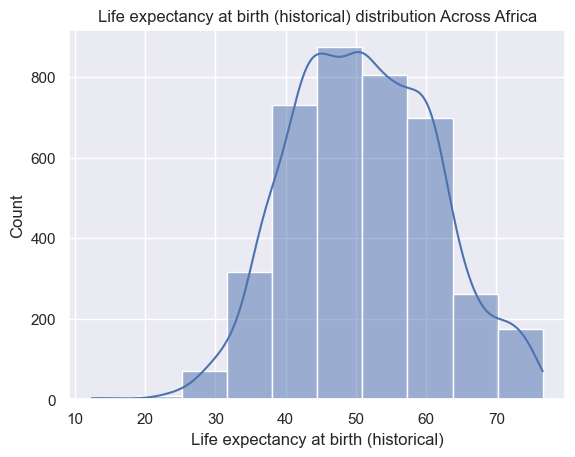

In [108]:
# Histogram of Life Expectancy Across African Regions
sns.histplot(x='Life expectancy at birth (historical)', data=df, bins=10, kde=True);
plt.title('Life expectancy at birth (historical) distribution Across Africa')
plt.show()

In [109]:
print(df['Life expectancy at birth (historical)'].skew())
print(df['Life expectancy at birth (historical)'].kurtosis())

0.10413540700310524
-0.37377248673122


### Insight: We have an almost a normal distribution for age of life expectance with most between 45 - 55yrs. Numbers sharply reduce as Africans get to 60yrs. Skewness of 0.1 is very close for a normal distribution. 

### Kurtosis is platykurtic, basically showing slight outliers in the left


In [110]:
# Checking All Countries in Africa from Lowest to Hishest in Life Expectancny.
Lowest = df.groupby('CountryName')[['Life expectancy at birth (historical)']].max().sort_values\
(by='Life expectancy at birth (historical)').astype(int)
Lowest

,Life expectancy at birth (historical)
CountryName,
Nigeria,52
Chad,53
Central African Republic,55
South Sudan,55
Somalia,57
Côte d’Ivoire,59
Lesotho,59
Mali,59
Guinea,59


### Insight: Nigeria, Chad, Central African Republic have the lowest, while Tunisia, Algeria and Cabo Verde (Cape Verde)

## BIVARIATE ANALYSIS. 

### Data Visualisations for better interaction

In [111]:
# The first 15 countries with the least life expectancy
dfx = Lowest.head(10).reset_index()
dfx

,CountryName,Life expectancy at birth (historical)
0,Nigeria,52
1,Chad,53
2,Central African Republic,55
3,South Sudan,55
4,Somalia,57
5,Côte d’Ivoire,59
6,Lesotho,59
7,Mali,59
8,Guinea,59
9,Burkina Faso,60


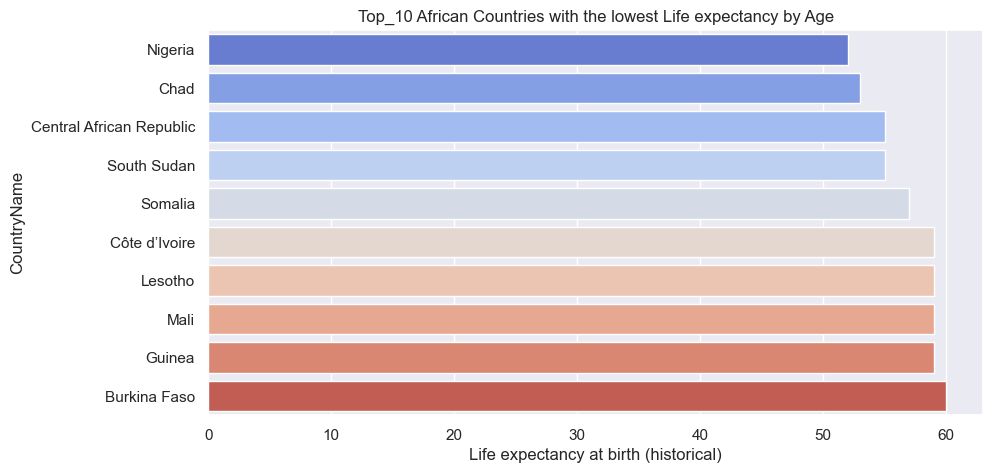

In [112]:
# Visualise the top 10 countries with the lowest lif expectancy
plt.figure(figsize=(10,5))

plt.title('Top_10 African Countries with the lowest Life expectancy by Age')

ax = sns.barplot(y='CountryName', x='Life expectancy at birth (historical)', data=dfx, ci=None, palette='coolwarm')

# Add labels to each bar
#for index, row in dfx.iterrows():
    
    #ax.text(index, row.Lifeexpectancyatbirth(historical), row.Lifeexpectancyatbirth(historical), color='black', ha='center')


### Insight: Nigeria to Burkinafaso are the top 10 countries with the least life expectancy. it is worthy to note that 5 of these countries are in west african region, with 2 in middle african and only 1 in Southern region

In [113]:
# Checking also the top 10 life expectancy by Age
Top_10 = Lowest.tail(10).reset_index()
Top_10

,CountryName,Life expectancy at birth (historical)
0,Sao Tome & Principe,68
1,Senegal,68
2,Egypt,71
3,Libya,72
4,Seychelles,74
5,Morocco,74
6,Mauritius,75
7,Tunisia,76
8,Algeria,76
9,Cabo Verde,76


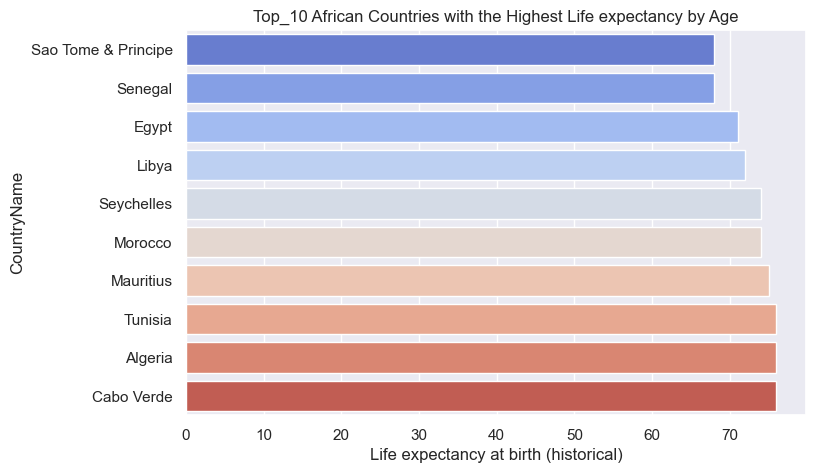

In [114]:
# Top 10 Countries with the hihghest Life Expectancy
plt.figure(figsize=(8,5))
sns.barplot(y='CountryName', x='Life expectancy at birth (historical)', data=Top_10, palette='coolwarm')
plt.title('Top_10 African Countries with the Highest Life expectancy by Age');

### Insight: Cape Verde, Algeria and Tunisia are leading, while STP, Senegal and Egypt are trailing. A good of number (5) of the top_10 are in North Africa while the rest is share in the other region

In [115]:
# We Also try to group the years to see if there is a thrend with the life expectancy by using the mean
Relationship = round(df.groupby('Year')['Life expectancy at birth (historical)'].mean()).astype(int).reset_index()
Relationship

,Year,Life expectancy at birth (historical)
0,1921,26
1,1923,29
2,1924,31
3,1927,26
4,1928,31
...,...,...
93,2017,63
94,2018,64
95,2019,64
96,2020,64


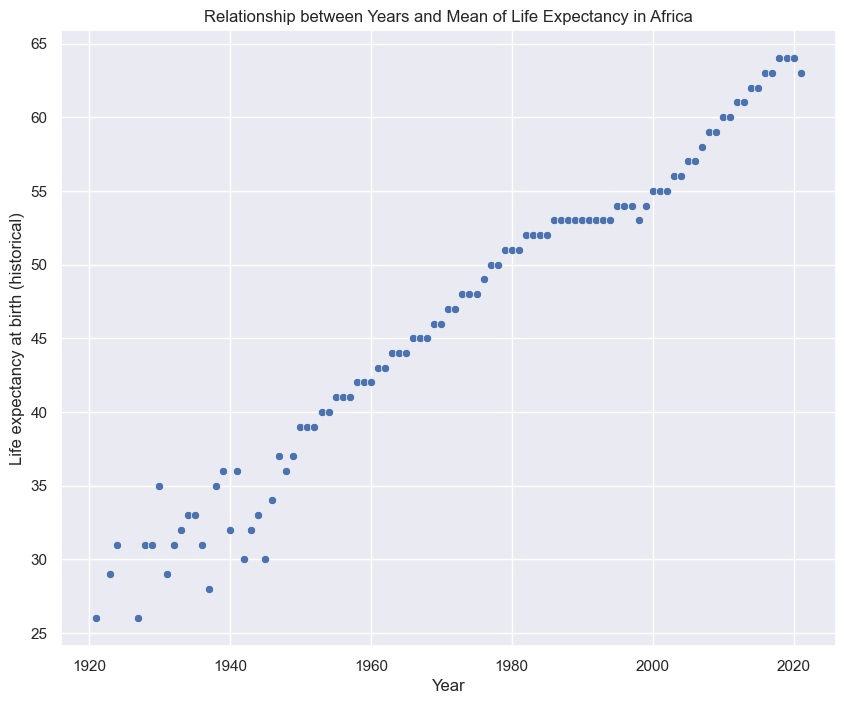

In [116]:
# We shall try to visualise the Mean of the life expectancy over the years
plt.figure(figsize=(10,8))
sns.scatterplot(y='Life expectancy at birth (historical)', x='Year', data=Relationship)
plt.title('Relationship between Years and Mean of Life Expectancy in Africa')
plt.show()

### Insight: The Life expectancy in Africa have increased over the years, with goo correlation between the years and ages; looking at the mean values, there has been good and steady improvement

In [117]:
# Checking which incomegroup have the least life expectancy using the group function
df3 = df.groupby('IncomeGroup')['Life expectancy at birth (historical)'].mean().astype(int).sort_values().reset_index()
df3

,IncomeGroup,Life expectancy at birth (historical)
0,Low income,47
1,Lower middle income,53
2,Upper middle income,56
3,High income,64


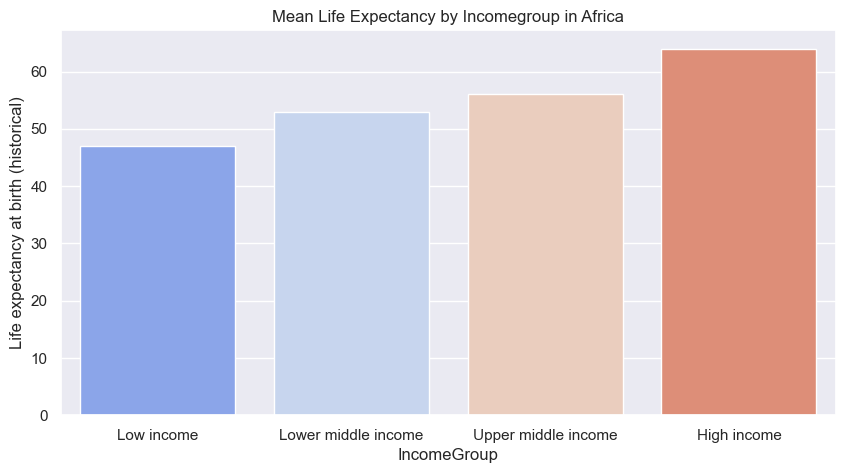

In [72]:
# Visualise
plt.figure(figsize=(10,5))
plt.title('Mean Life Expectancy by Incomegroup in Africa')
ax = sns.barplot(y='Life expectancy at birth (historical)', x='IncomeGroup', data=df3, palette='coolwarm', ci=None)

plt.show()

### Insight: Life expectancy increases as the earning capacity increase,

In [120]:
# We shall also compare the life expectancy across africa with the Region. to see which region has the highest
df4 = df.groupby('Region')['Life expectancy at birth (historical)'].mean().astype(int).sort_values().reset_index()
df4

,Region,Life expectancy at birth (historical)
0,Western Africa,48
1,Eastern Africa,50
2,Middle Africa,50
3,Southern Africa,54
4,Northern Africa,56


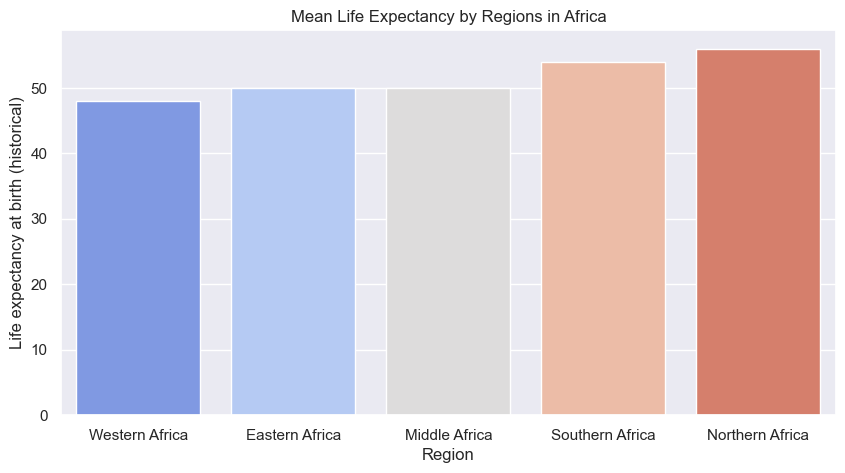

In [121]:
# We shall also visualise the data above to see where we are
plt.figure(figsize=(10,5))
plt.title('Mean Life Expectancy by Regions in Africa')
ax = sns.barplot(y='Life expectancy at birth (historical)', x='Region', data=df4, palette='coolwarm', ci=None)

plt.show()

### Northern Africa and Southern Africa have the highest Figures with the Western region as lowest mean ages.

## MULTIVARIATE ANALYSIS

- 2 Catergories against the Age

In [122]:
# WE SHALL COMPARE THE REGION, INCOME GROUP AND AGAINST LIFE EXPECTANCY
Region2 = df.groupby(['Region', 'IncomeGroup'])['Life expectancy at birth (historical)'].mean().astype(int) \
.sort_values().reset_index()
Region2

,Region,IncomeGroup,Life expectancy at birth (historical)
0,Middle Africa,Low income,46
1,Western Africa,Low income,46
2,Eastern Africa,Low income,47
3,Middle Africa,Lower middle income,51
4,Southern Africa,Lower middle income,51
5,Western Africa,Lower middle income,51
6,Eastern Africa,Lower middle income,52
7,Middle Africa,Upper middle income,52
8,Northern Africa,Low income,53
9,Northern Africa,Lower middle income,56


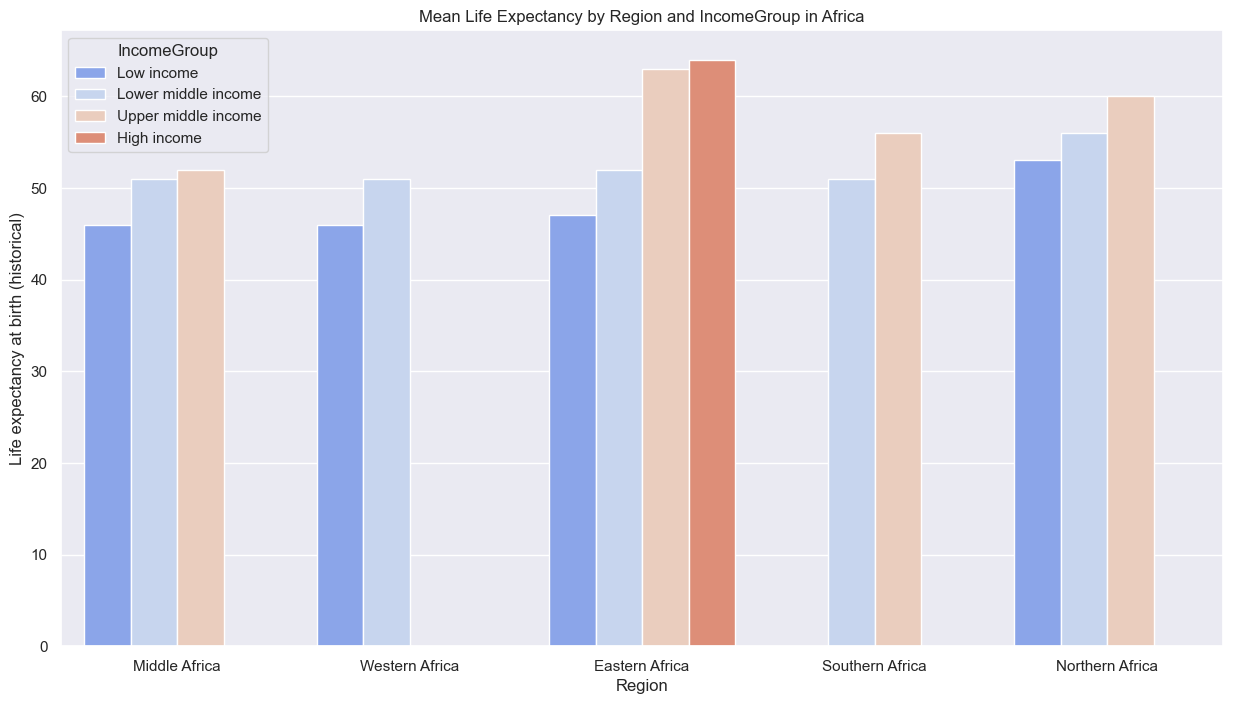

In [123]:
# We shall go ahead and perform A multivariate analysis to visualise th above
plt.figure(figsize=(15,8))
plt.title('Mean Life Expectancy by Region and IncomeGroup in Africa')
ax = sns.barplot(x='Region', y='Life expectancy at birth (historical)', data=Region2, palette='coolwarm', hue='IncomeGroup')
plt.show()

### Insights: Only one region in Africa records a 'High Income Class', and the income is also widely distributed which is the Eastern Region.

### Worthy to Note that low income class have an average life expactancy of 45years across Middle, western and Eastern region, except the Northern region.

### Across all regions, as the income class increase, life expectancy also increase


In [124]:
# We need to identity which Country(s) in the Eastern African Region that we have the 'High Income Class'
df[df['IncomeGroup'] == 'High income'][['CountryName','IncomeGroup', 'Region']]

,CountryName,IncomeGroup,Region
3283,Seychelles,High income,Eastern Africa
3284,Seychelles,High income,Eastern Africa
3285,Seychelles,High income,Eastern Africa
3286,Seychelles,High income,Eastern Africa
3287,Seychelles,High income,Eastern Africa
...,...,...,...
3350,Seychelles,High income,Eastern Africa
3351,Seychelles,High income,Eastern Africa
3352,Seychelles,High income,Eastern Africa
3353,Seychelles,High income,Eastern Africa


### Seychelles in Eastern African remains the only country in Africa with incomegroup as High income

In [125]:
# We shall also perform a multivariate analysis on the Mean life expectancy over the years grouping with 
#Year and income group
Region3 = df.groupby(['Year', 'IncomeGroup'])['Life expectancy at birth (historical)'].mean().astype(int) \
.sort_values().reset_index()
Region3

,Year,IncomeGroup,Life expectancy at birth (historical)
0,1927,Low income,23
1,1921,Low income,24
2,1931,Low income,24
3,1927,Lower middle income,26
4,1937,Low income,26
...,...,...,...
319,2013,High income,73
320,2010,High income,73
321,2017,High income,73
322,2018,High income,74


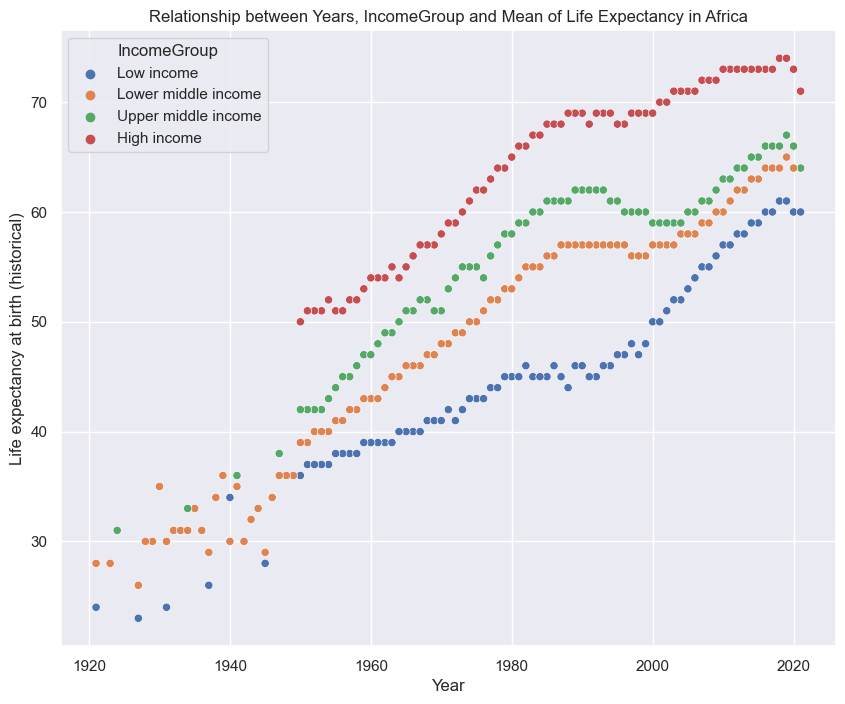

In [126]:
# We shall try to visualise the Mean of the life expectancy over the years
plt.figure(figsize=(10,8))
sns.scatterplot(x='Year', y='Life expectancy at birth (historical)', data=Region3, hue='IncomeGroup')
plt.title('Relationship between Years, IncomeGroup and Mean of Life Expectancy in Africa')
plt.show()

### Insight: Life expectancy in general is at its lowest in 1920's and 1940's for both the Low and Lower middle income earners. 

### From 1950s, the segregation between the various income class became distinct. Although steady progressively, the low income still have the lowest.



In [127]:
# We shall also perform a multivariate analysis on the Mean life expectancy over the years grouping with 
#Year and income group
Region3 = df.groupby(['Year', 'Region'])['Life expectancy at birth (historical)'].mean().astype(int) \
.sort_values().reset_index()
Region3

,Year,Region,Life expectancy at birth (historical)
0,1927,Eastern Africa,23
1,1927,Western Africa,23
2,1931,Western Africa,24
3,1937,Western Africa,26
4,1937,Eastern Africa,26
...,...,...,...
395,2016,Northern Africa,72
396,2019,Northern Africa,72
397,2017,Northern Africa,72
398,2018,Northern Africa,72


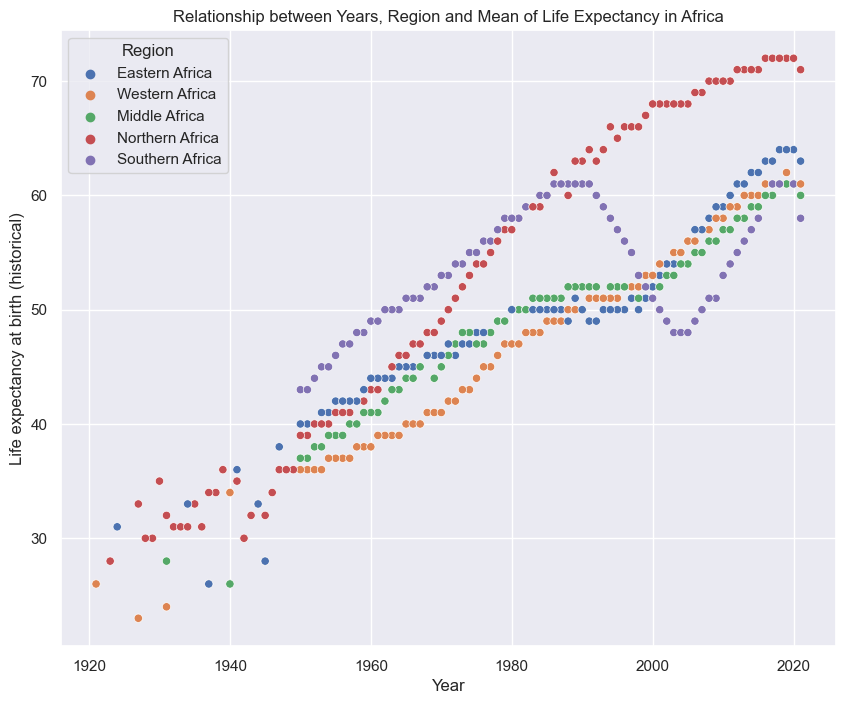

In [128]:
# We shall try to visualise the Mean of the life expectancy over the years
plt.figure(figsize=(10,8))
sns.scatterplot(x='Year', y='Life expectancy at birth (historical)', data=Region3, hue='Region')
plt.title('Relationship between Years, Region and Mean of Life Expectancy in Africa')
plt.show()

### Insight: All regions have experienced a consistent growth in life expectancy with south african region leading before the sharp decline in 1990s up till 2002 (approx).

### The Sharp decline is worthy of further investigations, but by research the region experienced a sudden drop beginning after 1995, as the HIV/AIDS epidemic spread throughout the region, beginning in the early 1990s.

In [145]:
dfs = df.loc[df['Region'] == 'Southern Africa']
dfs


,Code,Year,Life expectancy at birth (historical),CountryName,IncomeGroup,Region
289,BWA,1950,44.9,Botswana,Upper middle income,Southern Africa
290,BWA,1951,45.3,Botswana,Upper middle income,Southern Africa
291,BWA,1952,45.9,Botswana,Upper middle income,Southern Africa
292,BWA,1953,46.5,Botswana,Upper middle income,Southern Africa
293,BWA,1954,47.1,Botswana,Upper middle income,Southern Africa
...,...,...,...,...,...,...
3788,ZAF,2017,65.4,South Africa,Upper middle income,Southern Africa
3789,ZAF,2018,65.7,South Africa,Upper middle income,Southern Africa
3790,ZAF,2019,66.2,South Africa,Upper middle income,Southern Africa
3791,ZAF,2020,65.3,South Africa,Upper middle income,Southern Africa


In [146]:
dfs[dfs['Year'].between(1990, 2005)]


,Code,Year,Life expectancy at birth (historical),CountryName,IncomeGroup,Region
329,BWA,1990,60.5,Botswana,Upper middle income,Southern Africa
330,BWA,1991,59.5,Botswana,Upper middle income,Southern Africa
331,BWA,1992,58.3,Botswana,Upper middle income,Southern Africa
332,BWA,1993,57.7,Botswana,Upper middle income,Southern Africa
333,BWA,1994,56.2,Botswana,Upper middle income,Southern Africa
...,...,...,...,...,...,...
3772,ZAF,2001,57.3,South Africa,Upper middle income,Southern Africa
3773,ZAF,2002,55.7,South Africa,Upper middle income,Southern Africa
3774,ZAF,2003,54.3,South Africa,Upper middle income,Southern Africa
3775,ZAF,2004,54.0,South Africa,Upper middle income,Southern Africa


### The Decline in age was remarkable between 1990 - 2005

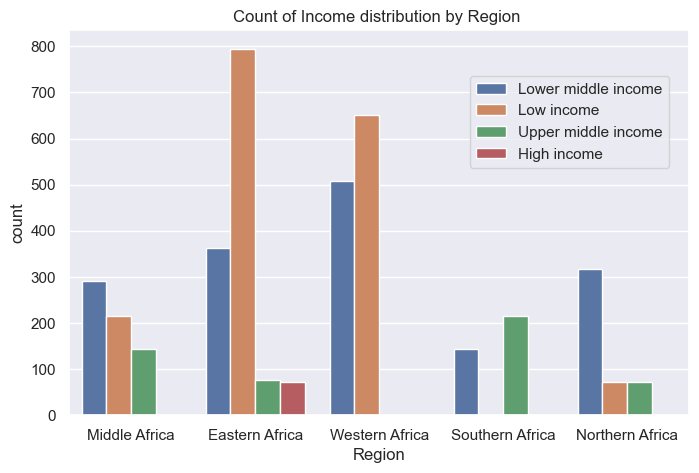

In [167]:
# We shall also perform a analysis on the count and  income group across the regions of African
plt.figure(figsize=(8,5))

plt.title('Count of Income distribution by Region ')
ax = sns.countplot(x='Region', data=df, hue='IncomeGroup')
ax.legend(loc='upper right',bbox_to_anchor=(0.98, 0.9));

### INSIGHT: The Eastern and Western Parts of Africa, have by count most of the Low and lower middle income earnings. Worse even in Western African region with no recorded Upper middle income

### South Africa currently do not have low income earners.

### Across all zones in Africa have a signifcant population of people with Lower middle income

### High income earners are only present in Easter African and no other zone, which is Seychelles as we saw above

